<a href="https://colab.research.google.com/github/Repollo1000/ADA-Informes/blob/main/TopologicalSorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Descripción del problema(Ordenamiento topológico)**

El Ordenamiento topológico se define G que es un grafo con sus vertice y arcos.

$G$ debe ser un grafo dirigido donde se le asigna $f(v)$ a cada vértice $v\in V$.

Para cada arco $(v,w)\in E$, se cumple que $f(v)< f()$.

El problema conciste en encintrar una secuencia para realizar tareas de cierta forma que las restricciones que existan con anterioridad sean respetadas.
Por ejemplo la malla curricular de una carrera, donde debemos respetar el orden para cursar los ramos. 

**Entrada**: Grafo dirigido sin ciclos $G=(V,E)$.

**Salida:** Un orden topológico de los vértices de $G$. Es decir, una asignación $f(v)$ a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v)<f(w)$.



# **2.Descripción del algoritmo**

El algoritmo de orden topológico realiza varias búsquedas en profundidad(**DFS**) a partir de nodos no explorados, en cada búsqueda realiza un recorrido post-orden(recorre primero las hojas y después los ancestros), cada vez que se visita un nodo se etiqueta con un contador decreciente que es inicializado con el total de nodos.

Para que funcione correctamente el algoritmo Debemos tener un grafo dirigido sin ciclos(DAG)

**Pasos**:

1.   Crearemos una pila temporal que guardara el orden de los nodos
2.   Llamamos el DFS de manera recursiva o no recursiva
3.   iremos guardando los nodos en la pila generada
4.   Una vez recorrido todos los nodos se retorna la pila que representa el orden topológico



## **2.1.Ejemplo paso a paso**


foto



creamos una pila para almacenar los nodos y otra para marcar si fueron visitados

`[  |  |  |  |  |  ]`

`[  |  |  |  |  |  ]`

LLamamos a la funcion dfs que escoge un nodo en este caso es el 2

Marcamos como visitado al nodo elegido y a los adyacentes

`visitados = [2 |3 |1 |  |  |  ]`

Los ingresamos a la pila

`pila = [2 |3 |1 |  |  |  ]`

se ingresan al arreglo que contiene los datos ordenados

`Orden = [1 |3 |2 |  |  |  ]`


LLamamos a la funcion dfs que escoge un nodo aleatorio 4

Marcamos como visitado al nodo elegido y a los adyacentes

`visitados = [2 |3  |1 |4 |0 |  ]`

Los ingresamos a la pila

`pila = [4 |0 | |  |  |  ]`

se ingresan al arreglo que contiene los datos ordenados

`Orden = [1 |3 |2 |0 |4 |  ]`


LLamamos a la funcion dfs que escoge un nodo aleatorio 5

Marcamos como visitado al nodo elegido y a los adyacentes

`visitados = [2 |3  |1 |4 |0 |5 ]`

Los ingresamos a la pila

`pila = [5 | | |  |  |  ]`

se ingresan al arreglo que contiene los datos ordenados

`Orden = [1 |3 |2 |0 |4 |5 ]`

Retornamos este arreglo que representa el orden topologico

`Orden = [1 |3 |2 |0 |4 |5 ]`

## 2.2Código

### **2.3.Generador de instancia**

In [28]:
from collections import defaultdict
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph
V = 5
grafo = graph_instance_creator(V)
print(grafo)
t = len(grafo)
print(t)

defaultdict(<class 'list'>, {1: [4], 0: [4, 3], 4: [3]})
3


In [29]:
from collections import defaultdict
import networkx as nx

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph

graph_to_nxdigraph(grafo)

In [67]:
def draw_graph(G):
  labels = dict()

  for i in G.nodes():
    labels[i] = G.nodes[i]['symbol'] + '\n' + str(G.nodes[i]['order'])

  pos = nx.spring_layout(G,k=10,seed=1)
  nx.draw(G, pos, with_labels=True, labels=labels, font_size=10,
          node_size=1000, node_color='white', edgecolors='green')
  plt.show()
  plt.close()

def int_to_alpha(n):
   return chr(ord('a') + n)

### **2.4.Iterativo**

In [88]:
def topologicalSort_Iterativo(arbol, verbose=False):
  state = dict()
  for n in arbol: state[n] = 'No visitado'

  Laux = [] #Lista auxiliar guarda el orden
  for n in arbol:
    stack=[n]
    while len(stack)>0:
      n = stack.pop()
      if state[n] == 'No visitado':
        state[n] = 'visitado'
        if(verbose == True):
          print("Nodo padre visitado: ",n)

        stack.append(n)
        for adj in reversed(list(arbol[n])):
          if state[adj] == 'No visitado': 
            stack.append(adj)
            if(verbose == True):
              print("Nodo Hijo visitado: ",adj)
      elif state[n] == 'visitado':
        state[n] = 'visitado'
        Laux.append(n)
        if(verbose == True):
            print("Pila que guarda los nodos: ",Laux)

  #Damos vuelta la lista auxiliar
  Laux = list(reversed(Laux))

  return Laux


g = graph_instance_creator(10)
arbol =graph_to_nxdigraph(g)
verbose=False

lista = topologicalSort_Iterativo(arbol,verbose)



[6, 0, 4, 1, 9, 5, 8, 3, 2, 7, 5, 8, 3, 2, 0, 3, 1, 3, 5, 0]


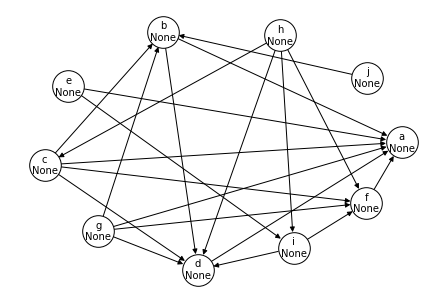

In [89]:
print (lista)

draw_graph(arbol)

### **2.5.Recursivo**

In [86]:
def DFS_recursivo(G, initial, cont, sorted):
  G.nodes[initial]['state'] = 1 # Marcamos el nodo como descubierto

  # Obtenemos la lista con los nodos adyacentes
  adj_list = list(reversed(list(G[initial])))


  for adj in adj_list: # Recorremos los nodos adyacentes
    if G.nodes[adj]['state'] == 0: # Si el nodo no ha sido descubierto

      # Llamamos recursivamente a DFS con cada nodo adyacente no explorado
      cont, sorted = DFS_recursivo(G, adj, cont, sorted)

  G.nodes[initial]['order'] = cont # Etiquetamos el nodo con su orden de visita
  G.nodes[initial]['state'] = 2 # Marcamos el nodo como visitado
  sorted.append(int_to_alpha(initial)) # Insertamos el nodo a la lista ordenada


  cont -= 1 # Disminuimos el contador en 1

  # Retornamos la lista ordenada de nodos y el contador actual
  return cont, sorted
def topological_sort_recursivo(G):
  cont = len(G.nodes())
  sorted = list()

  for n in G.nodes(): # Recorremos los nodos del árbol
    if G.nodes[n]['state'] == 0: # Si el nodo no ha sido explorado

      # Aplicamos DFS con cada nodo no explorado
      cont, sorted = DFS_recursivo(G, n, cont, sorted)

  sorted.reverse() # Invertimos la lista

  return sorted 
grafo = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(grafo)
sorted = topological_sort_recursivo(G)

{0: [5, 7], 1: [3, 8, 5], 2: [6], 3: [5, 7, 8], 4: [6, 8, 7, 5], 5: [7], 6: [7], 8: [7], 9: [7, 3, 8]}


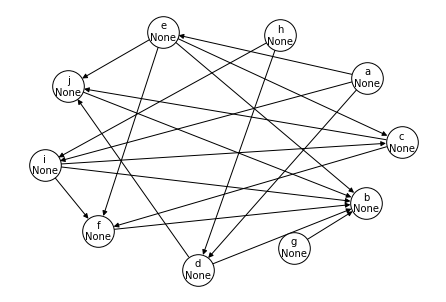

In [87]:
print(grafo)
draw_graph(arbol)

### **2.5.Verbose(iterativo)**

In [ ]:
g = graph_instance_creator(10)
print("Entrada: ")
print(g)
arbol =graph_to_nxdigraph(g)
print("\nNodos y arcos: ")
print(arbol)
lista = topologicalSort_Iterativo(arbol,verbose=True)

print("\nOrden topologico: ")
print (lista)

Entrada: 
defaultdict(<class 'list'>, {0: [8, 4, 7], 1: [6, 4], 3: [6, 5, 2], 4: [6, 2, 5], 5: [6], 2: [8, 9, 7], 6: [7], 8: [9], 7: [9]})

Nodos y arcos: 
DiGraph with 10 nodes and 18 edges
Nodo padre visitado:  0
Nodo Hijo visitado:  7
Nodo Hijo visitado:  4
Nodo Hijo visitado:  8
Nodo padre visitado:  8
Nodo Hijo visitado:  9
Nodo padre visitado:  9
Pila que guarda los nodos:  [9]
Pila que guarda los nodos:  [9, 8]
Nodo padre visitado:  4
Nodo Hijo visitado:  5
Nodo Hijo visitado:  2
Nodo Hijo visitado:  6
Nodo padre visitado:  6
Nodo Hijo visitado:  7
Nodo padre visitado:  7
Pila que guarda los nodos:  [9, 8, 7]
Pila que guarda los nodos:  [9, 8, 7, 6]
Nodo padre visitado:  2
Pila que guarda los nodos:  [9, 8, 7, 6, 2]
Nodo padre visitado:  5
Pila que guarda los nodos:  [9, 8, 7, 6, 2, 5]
Pila que guarda los nodos:  [9, 8, 7, 6, 2, 5, 4]
Pila que guarda los nodos:  [9, 8, 7, 6, 2, 5, 4, 7]
Pila que guarda los nodos:  [9, 8, 7, 6, 2, 5, 4, 7, 0]
Pila que guarda los nodos:  [9, 8, 7,

# **3.Correctitud**

Para probar que el algoritmo es correcto nos debemos centrar en la funcion dfs,
analizar como funciona

En cada iteracion se escoge un nodo padre con sus hijos, explora los hijos revisando si fueron visitados o no visitados.



Teorema Topological Sort Algorithm 



El algoritmo es correcto si para la conexion (u, v) que pertenece al grafo se cumple que f(u) > f(v) .

prueba 



Case base: 

La cantidad de nodos es 1 por lo que no tiene arcos ni aristas, entonces está sería la solución al problema y para este caso sería correcto.

Caso inductivo:

Para este caso tenemos que la cantidad de nodos es superior a 1.

Tenemos un stack que represente cada nodo, sirve para marcar los nodos visitados, ahora se elige un nodo que es marcado como visitado junto a sus nodos adyacentes, son guardados en la pila, al marcarlos como visitado evitaremos volver a pasar por los mismos nodos. Aunque cada vez que elegimos un nodo vamos a tener dos opciones para resolver este problema la primera es que no tengamos nodos adyacentes, por suerte no es tan complicado este caso porque se guarda el nodo escogido en la pila en el segundo caso que seria cuando el nodo tiene uno o más nodos adyacentes, se resolverá de manera iterativa o recursiva lo que implica que el proceso que se explicó anterior se va a repetir hasta llegar al caso base.

Este proceso se va a repetir hasta que todos los nodos del grafo sean marcados como visitado y retorne la pila con el orden topológico, ahora podemos decir con seguridad que el algoritmo es correcto
 

1.   Crearemos una pila temporal que guardara el orden de los nodos
2.   Llamamos el DFS de manera recursiva o no recursiva
3.   iremos guardando los nodos en la pila generada
4.   Una vez recorrido todos los nodos se retorna la pila que representa el orden topológico



# **4.Tiempo de ejecución**

Este algoritmo tiene una complejidad de O(V+E) donde V representa la cantidad de nodos y e representa los vértices.

**Demostración**

Este tiempo de ejecución se consigue analizando el código.

En la primera parte se crea una pila para almacenar cada nodo, eso tiene un costo de O(v) por causa de que lo guarda solo una vez.

También tenemos que recorrer cada nodo que tiene un costo O(e) por causa de que pasamos solo una vez por sus conexiones(arcos).

Al hacer una simple suma podemos demostrar que tiene una complejidad de O(V+E).

# **5.Experimentos**

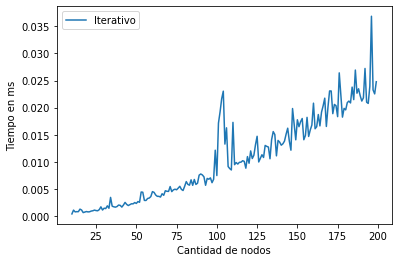

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y1=[]; y2=[]

for n in range(10,200):
  G = graph_instance_creator(n)
  G = graph_to_nxdigraph(G)
  H = G.copy()
  verbose = False

  t1 = repeat(setup="from __main__ import topologicalSort_Iterativo", stmt=lambda: topologicalSort_Iterativo(G), repeat=1, number=10)
 

  x.append(n)
  y1.append(t1)
  #y2.append(t2)

plt.plot(x,y1)
#plt.plot(x,y2)
plt.legend(["Iterativo"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

# **6.Resultados**

Gráfico 1:

Podemos ver que a medida que crece la cantidad de nodos se va demorando, más a pesar de que tenemos uno pecks en el gráfico, eso se puede interpretar como recciones inesperadas del procesador, aunque lo más importante es que podemos demostrar que el tiempo de ejecución es O(V + E).